In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np 
import pandas as pd
opts = {"with_labels": True, "node_color":'g'}

In [14]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 



La matriz de acoplamiento es:
[[-4.  1.  1. ...  0.  1.  1.]
 [ 1. -4.  1. ...  0.  0.  1.]
 [ 1.  1. -6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 1.  0.  0. ...  1. -4.  1.]
 [ 1.  1.  0. ...  0.  1. -4.]]
El coeficiente de agrupamiento promedio es: 0.3053333333333333
El promedio del camino mas corto es: 3.4


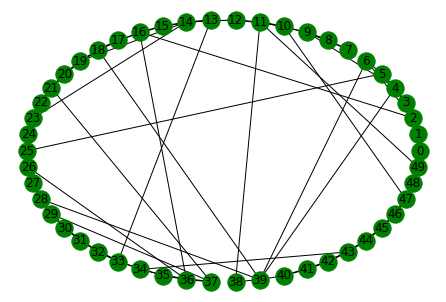

In [17]:
n, k = 50, 2
p = 0.2
G = nx.watts_strogatz_graph(n, 2*k, p)
nx.draw_circular(G,**opts)
ma = matriz_acoplaminento(G)
print("La matriz de acoplamiento es:")
print(ma)
print("El coeficiente de agrupamiento promedio es:",nx.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))